### Odvození $f_{new}(x)$ pro transformaci na homogenní okrajové podmínky

1.  **Původní diferenciální rovnice:**
    $$ -k u''(x) + p u'(x) + q u(x) = f(x) \quad \text{pro } x \in (0, 1) $$
    s okrajovými podmínkami $u(0) = \hat{u}_1$ a $u(1) = \hat{u}_2$.

2.  **Substituce:** Zavedeme novou funkci $w(x)$ tak, že $u(x) = w(x) + u_b(x)$.
    * $w(x)$ musí splňovat homogenní okrajové podmínky: $w(0) = 0$ a $w(1) = 0$.
    * $u_b(x)$ je známá funkce splňující původní okrajové podmínky: $u_b(0) = \hat{u}_1$ a $u_b(1) = \hat{u}_2$. Například $u_b(x) = \hat{u}_1(1-x) + \hat{u}_2 x$.

3.  **Derivace substituce:**
    * $u'(x) = w'(x) + u_b'(x)$
    * $u''(x) = w''(x) + u_b''(x)$

4.  **Dosazení do původní rovnice:**
    $$ -k (w''(x) + u_b''(x)) + p (w'(x) + u_b'(x)) + q (w(x) + u_b(x)) = f(x) $$

5.  **Roznásobení:**
    $$ -k w''(x) - k u_b''(x) + p w'(x) + p u_b'(x) + q w(x) + q u_b(x) = f(x) $$

6.  **Separace členů s $w(x)$ a známých členů:** Ponecháme členy s $w$ a jeho derivacemi na levé straně a ostatní (známé) členy převedeme na pravou stranu.
    $$ -k w''(x) + p w'(x) + q w(x) = f(x) + k u_b''(x) - p u_b'(x) - q u_b(x) $$

7.  **Definice $f_{new}(x)$:** Pravá strana této rovnice představuje novou "zatěžovací" funkci pro diferenciální rovnici pro $w(x)$. Označíme ji $f_{new}(x)$.
    $$ f_{new}(x) = f(x) + k u_b''(x) - p u_b'(x) - q u_b(x) $$

Nyní řešíme novou úlohu pro $w(x)$:
$$ -k w''(x) + p w'(x) + q w(x) = f_{new}(x) \quad \text{pro } x \in (0, 1) $$
s homogenními okrajovými podmínkami $w(0) = 0$ a $w(1) = 0$.

## Odvození variační formulace pro úlohu s $f_{n}$

$$ -k w''(x) + p w'(x) + q w(x) = f_{n}(x) \quad \text{pro } x \in (0, 1) =I $$
s homogenními okrajovými podmínkami $w(0) = 0$ a $w(1) = 0$.
Provedeme přenásobení testovacími funkcemi z $ H_0^1 (I)$ a integraci přes $I$.
$$\int_I -kw''v +\int_I p w'v +\int_I qwv = \int_I f_n v$$
Provedeme klasické per-partes, jelikož $w$ je nulové na koncích, tak řešení bude:
$$\int_I kw'v' +\int_I p w'v +\int_I qwv = \int_I f_n v$$

Po vyřešení je třeba zpětně dopočítat $u$, které už bude žít na prostoru splňujícím dirichletovy podmínky

Dělání matice A a vektoru b
 Řádek 1/1
Aproximace sestavena.
------------------------------
Parametry: k=1.0, p=0.0, q=0.0, u(0)=0.0, u(1)=0.0
Pravá strana f(x) = 1
Počet bázových funkcí N = 1
Vypočtené koeficienty c = [0.5]
Funkce u_b(x) = 0
Aproximace řešení u_N(x) = -0.5*x**2 + 0.5*x
Analytické řešení u_exact(x) = -0.5*x**2 + 0.5*x
Rozdíl u_N(x) - u_exact(x) = 0


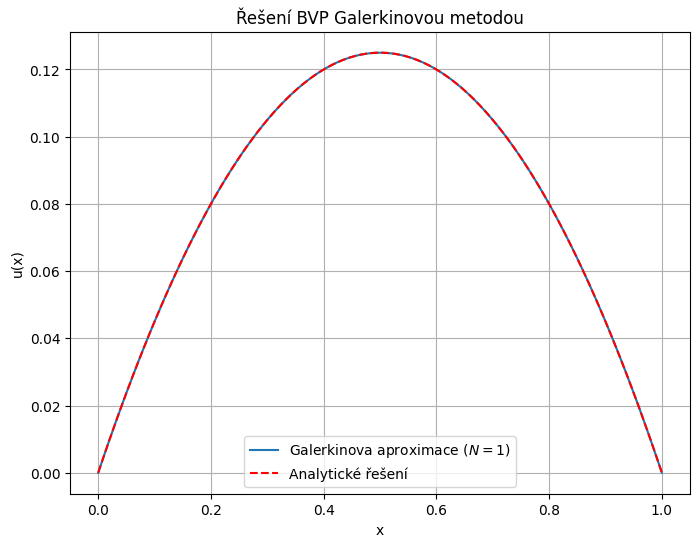

In [ ]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
def solve_bvp_galerkin_polynomial(k_val, p_val, q_val, u1_hat_val, u2_hat_val, f_expr, N):
    x = sympy.symbols('x')
    k, p, q, u1_hat, u2_hat = sympy.symbols('k p q u1_hat u2_hat')

    u_b = u1_hat * (1 - x) + u2_hat * x
    u_b_prime = sympy.diff(u_b, x)
    u_b_double_prime = sympy.diff(u_b_prime, x)

    f_new = f_expr + k * u_b_double_prime - p * u_b_prime - q * u_b

    phi = [(x**i) * (1 - x) for i in range(1, N + 1)]
    phi_diff = [sympy.diff(phi_i, x) for phi_i in phi]

    A = sympy.zeros(N, N)
    b = sympy.zeros(N, 1)

    print("Dělání matice A a vektoru b")
    for j in range(N):
        print(f" Řádek {j+1}/{N}")
        integrand_b = f_new * phi[j]
        b[j] = sympy.integrate(integrand_b, (x, 0, 1))


        for i in range(N):
            integrand_A = k * phi_diff[i] * phi_diff[j] + \
                          p * phi_diff[i] * phi[j] + \
                          q * phi[i] * phi[j]
            A[j, i] = sympy.integrate(integrand_A, (x, 0, 1))

    A_sub = A.subs({k: k_val, p: p_val, q: q_val})
    b_sub = b.subs({k: k_val, p: p_val, q: q_val, u1_hat: u1_hat_val, u2_hat: u2_hat_val, f_expr: f_expr}) # f_expr se dosadí samo v f_new

    A_num = np.array(A_sub).astype(np.float64)
    b_num = np.array(b_sub).astype(np.float64)

    c_coeffs = np.linalg.solve(A_num, b_num)
    c_coeffs = c_coeffs.flatten() 

    # Zpětné dosazení do aproximace
    w_N = sum(c_coeffs[i] * phi[i] for i in range(N))
    u_N = w_N + u_b.subs({u1_hat: u1_hat_val, u2_hat: u2_hat_val})

    print("Aproximace sestavena.")
    return u_N, c_coeffs, phi, u_b.subs({u1_hat: u1_hat_val, u2_hat: u2_hat_val})

x = sympy.symbols('x')

k_value = 1.0
p_value = 0.0 
q_value = 0.0 # Zkusíme nejprve nejjednodušší případ -k*u'' = f(x)
u1_value = 0.0 
u2_value = 0.0 
f_function = sympy.sympify(1)
N_degree = 1   # Počet bázových funkcí (stupeň aproximace w_N je N+1)

u_approx, coeffs, basis_funcs, u_boundary = solve_bvp_galerkin_polynomial(
    k_value, p_value, q_value, u1_value, u2_value, f_function, N_degree
)


print("-" * 30)
print(f"Parametry: k={k_value}, p={p_value}, q={q_value}, u(0)={u1_value}, u(1)={u2_value}")
print(f"Pravá strana f(x) = {f_function}")
print(f"Počet bázových funkcí N = {N_degree}")
print(f"Vypočtené koeficienty c = {coeffs}")
print(f"Funkce u_b(x) = {u_boundary}")
print(f"Aproximace řešení u_N(x) = {sympy.expand(u_approx)}") # Expand pro přehlednost

if k_value == 1.0 and p_value == 0.0 and q_value == 0.0 and u1_value == 0.0 and u2_value == 0.0 and f_function == 1:
    u_analytic = 0.5 * x * (1 - x)
    print(f"Analytické řešení u_exact(x) = {sympy.expand(u_analytic)}")
    # V tomto případě by měly být u_approx a u_analytic stejné, protože analytické řešení je polynom stupně 2
    # a naše báze (pro N>=1) obsahuje x(1-x), a pro N>=2 obsahuje x^2(1-x). Kombinací lze přesně trefit 0.5*x(1-x).
    # Pro N=1, phi_1 = x(1-x). A_11 = k*int( (1-2x)*(1-2x), (x,0,1)) = k*1/3. b_1 = int(1*x(1-x),(x,0,1)) = 1/6.
    # A*c=b => (k/3)*c1 = 1/6 => c1 = 1/(2k). u_N = c1*phi_1 = 1/(2k)*x(1-x). Pro k=1 je to přesné.

    error_expr = sympy.simplify(u_approx - u_analytic)
    print(f"Rozdíl u_N(x) - u_exact(x) = {error_expr}") # Měl by být 0 nebo velmi blízko 0

u_approx_lambda = sympy.lambdify(x, u_approx, 'numpy')
x_vals = np.linspace(0, 1, 100)
u_vals = u_approx_lambda(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, u_vals, label=f'Galerkinova aproximace ($N={N_degree}$)')
if 'u_analytic' in locals():
        u_analytic_lambda = sympy.lambdify(x, u_analytic, 'numpy')
        u_analytic_vals = u_analytic_lambda(x_vals)
        plt.plot(x_vals, u_analytic_vals, label='Analytické řešení', linestyle='--', color='red')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Řešení BVP Galerkinovou metodou')
plt.legend()
plt.grid(True)
plt.show()



Dělání matice A a vektoru b
 Řádek 1/3
 Řádek 2/3
 Řádek 3/3
Aproximace sestavena.
Parametry: k=1.0, p=1.0, q=2.0, u(0)=1.0, u(1)=2.0
Pravá strana f(x) = x**6
Počet bázových funkcí N = 3
Funkce u_b(x) = 1.0*x + 1.0
Aproximace řešení u_N(x) = 0.312409005653124*x**4 + 0.114981877642393*x**3 + 0.867054253398213*x**2 - 0.29444513669373*x + 1.0


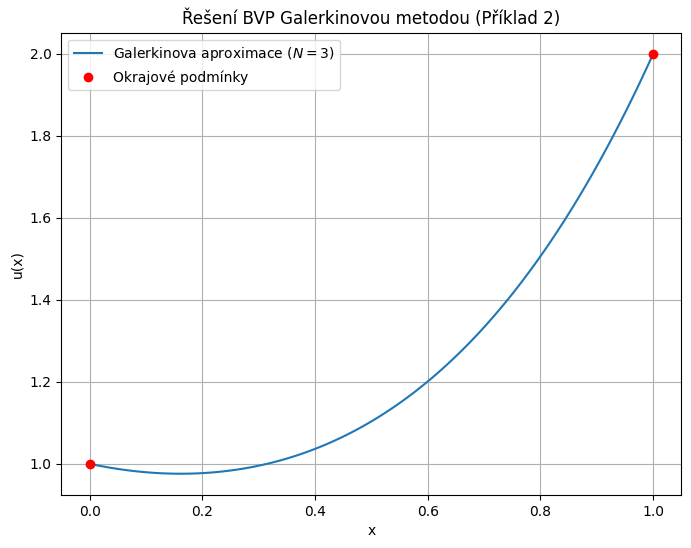

In [ ]:
k_value = 1.0
p_value = 1.0
q_value = 2.0
u1_value = 0 
u2_value = 1 
f_function = x**6 # f(x) = x^2
N_degree = 3   # Vyšší stupeň aproximace

u_approx, coeffs, basis_funcs, u_boundary = solve_bvp_galerkin_polynomial(
    k_value, p_value, q_value, u1_value, u2_value, f_function, N_degree
)

print(f"Parametry: k={k_value}, p={p_value}, q={q_value}, u(0)={u1_value}, u(1)={u2_value}")
print(f"Pravá strana f(x) = {f_function}")
print(f"Počet bázových funkcí N = {N_degree}")
# print(f"Vypočtené koeficienty c = {coeffs}") # Může být dlouhé
print(f"Funkce u_b(x) = {u_boundary}")
print(f"Aproximace řešení u_N(x) = {sympy.simplify(u_approx)}") # Simplify může pomoci

# Vykreslení výsledku
u_approx_lambda = sympy.lambdify(x, u_approx, 'numpy')
x_vals = np.linspace(0, 1, 100)
u_vals = u_approx_lambda(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, u_vals, label=f'Galerkinova aproximace ($N={N_degree}$)')
plt.plot([0, 1], [u1_value, u2_value], 'ro', label='Okrajové podmínky') # Zobrazíme OK

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Řešení BVP Galerkinovou metodou (Příklad 2)')
plt.legend()
plt.grid(True)
plt.show()